<a href="https://colab.research.google.com/github/ddopazo92/Introduccion_datascience_diego_dopazo/blob/main/ProyectoDSParteI%2BDopazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL - VISUALIZACIONES DE PYTHON

PRIMERA ENTREGA

# Abstract

En este proyecto trabajamos con el dataset Video_games.csv que contiene información sobre los videojuegos, sus ventas por region, el puntaje segun criticos y usuarios, los publicadores y los desarrolladores de estos mismos.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en los video juegos. A través de gráficos univariados, bivariados y multivariados, se buscará responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.

El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar una interpretación que permita entender mejor el fenómeno analizado.

El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación, y preparación para análisis posteriores como modelado o segmentación.






**Preguntas de interes:**

1- Cual es el mejor genero segun la critica


---


2- Cual es el mejor genero segun los usuarios


---


3- Cual es el juego mejor genero en general (criticos y usuarios)


---


4- Que tan cercano o lejano estan los generos mas populares y los que tienen mayor puntuacion promedio


---


5- Para donde se dirige la tendencia del genero de juego, es decir que genero es mas probable que los usuarios elijan al momento de jugar




# *# VISUALIZACIONES Y ANALISIS*

In [228]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


url = 'https://raw.githubusercontent.com/ddopazo92/Introduccion_datascience_diego_dopazo/refs/heads/main/Video_Games.csv'

df = pd.read_csv(url, sep=';')

##REEMPLAZO DE PALABRAS EN INGLES A ESPAÑOL
df = df.set_axis(['Juego', 'Consola', 'Año de lanzamiento','Genero', 'Publicador', 'Ventas USA','Ventas Europa', 'Ventas Japon','Ventas resto del Mundo',
                  'Ventas Totales', 'Puntuacion de criticos','Cantidad de criticos', 'Puntaje de Usuario','Cantidad de usuarios','Desarrollador','Clasificacion por Edad'], axis=1)

df['Juego'] = df['Juego'].str.upper()
df['Genero'] = df['Genero'].str.replace('Action','Accion')
df['Genero'] = df['Genero'].str.replace('Adventure','Aventura')
df['Genero'] = df['Genero'].str.replace('Fighting','Lucha')
df['Genero'] = df['Genero'].str.replace('Misc','Miscelania')
df['Genero'] = df['Genero'].str.replace('Platform','Plataforma')
df['Genero'] = df['Genero'].str.replace('Racing','Carreras')
df['Genero'] = df['Genero'].str.replace('Role-Playing','RPG')
df['Genero'] = df['Genero'].str.replace('Shooter','Disparos')
df['Genero'] = df['Genero'].str.replace('Simulation','Simulacion')
df['Genero'] = df['Genero'].str.replace('Sports','Deportes')
df['Genero'] = df['Genero'].str.replace('Strategy','Estrategia')

#convierto la columna 'Año de lanzamiento' de int a datatime64
df['Año de lanzamiento'] = pd.to_datetime(df['Año de lanzamiento'], format='%Y')

#genero un filtro en el rango de fechas para observar los datos dentro del Siglo 21
filtro_rango = (df['Año de lanzamiento'].dt.year >= 1999) & (df['Año de lanzamiento'].dt.year <= 2014)
filtro_rango_1 = (df['Año de lanzamiento'].dt.year >= 1999) & (df['Año de lanzamiento'].dt.year <= 2004)
filtro_rango_2 = (df['Año de lanzamiento'].dt.year >= 2005) & (df['Año de lanzamiento'].dt.year <= 2009)
filtro_rango_3 = (df['Año de lanzamiento'].dt.year >= 2010) & (df['Año de lanzamiento'].dt.year <= 2014)

#LE DI EL MISMO CRITERIO DE PUNTAJE A LOS USAURIOS COMO TIENEN LOS CRITICOS

puntaje_usuarios= [n * 10 for n in df['Puntaje de Usuario']]

##ESTO DA EL PUNTAJE PROMEDIO ENTRE LOS USUARIOS Y LA CRITICA

df['promedio de puntaje']= (df['Puntuacion de criticos'] + puntaje_usuarios)/2
df['cantidad promedio de criticas'] = (df['Cantidad de criticos'] + df['Cantidad de usuarios'])/2








In [25]:
df.describe()



,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticos,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje,cantidad promedio de criticas
count,7435,7435.000000,7435.000000,7435.000000,7435.000000,7435.000000,6867.000000,6867.000000,7435.000000,7435.000000,6867.000000,6867.000000
mean,2007-09-09 09:30:34.620040448,0.378238,0.226752,0.060095,0.080040,0.745303,70.265327,28.854522,7.124640,163.157767,71.047546,101.711446
min,1985-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,11.500000,4.000000
25%,2004-01-01 00:00:00,0.050000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.400000,10.000000,64.500000,15.000000
50%,2008-01-01 00:00:00,0.140000,0.060000,0.000000,0.020000,0.280000,72.000000,24.000000,7.500000,24.000000,73.500000,27.500000
75%,2011-01-01 00:00:00,0.380000,0.200000,0.010000,0.070000,0.720000,80.000000,39.000000,8.200000,81.000000,80.000000,64.000000
max,2016-01-01 00:00:00,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000,95.000000,5348.500000
std,NaN,0.933143,0.663916,0.276583,0.260859,1.892162,13.863650,19.201735,1.500294,564.631862,12.562565,296.498012


# *Histograma*

In [144]:
def generar_hist(df:pd.DataFrame) -> None:
  fig = plt.figure(figsize=(16, 9))
  df.hist(bins=10, figsize=(16, 9),layout=(3,4), color = 'skyblue', alpha = 0.7, edgecolor = 'black')
  plt.suptitle('Graficos de distribucion', fontsize=16, y=1.02)
  plt.tight_layout()
  plt.show()


<Figure size 1600x900 with 0 Axes>

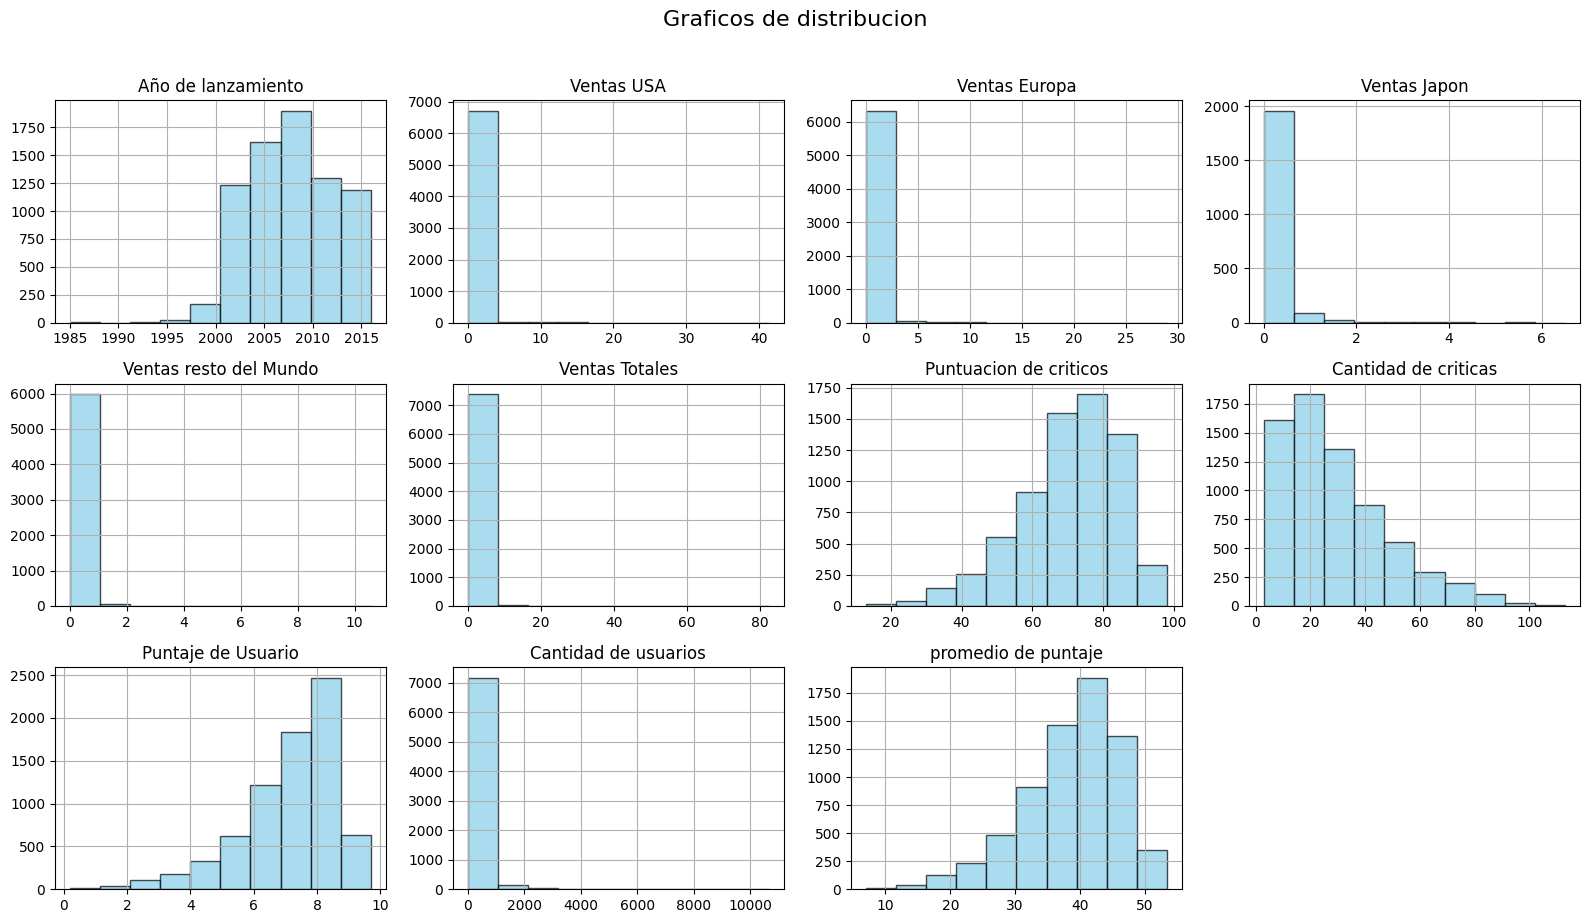

In [ ]:
generar_hist(df)

# GESTION DE DATOS NULOS

In [145]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge

In [146]:
##REEMPLAZO DE LOS DATOS 0 A NaN
df.replace(0,np.nan,inplace=True)

#IDENTIFICA LOS VALORES NULOS EN PORCENTAJE SEGUN LA COLUMNA
(df.isna().mean()*100).round(2).sort_values(ascending=False)

,0
Ventas Japon,71.76
Ventas resto del Mundo,18.79
Ventas Europa,14.32
Ventas USA,9.08
cantidad promedio de criticas,7.64
promedio de puntaje,7.64
Cantidad de criticos,7.64
Puntuacion de criticos,7.64
Clasificacion por Edad,1.12
Desarrollador,0.15


In [147]:
columna_simple_imputer = ['Puntaje de Usuario']
columna_knn_imputer = ['Ventas USA','Ventas Europa','Cantidad de criticos','Puntuacion de criticos','promedio de puntaje','Ventas resto del Mundo']
columna_iterative_imputer = ['Ventas Japon']

In [148]:
df_imputed = df.copy()

In [149]:
imputer_simple = SimpleImputer(strategy='median')
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])

In [150]:
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[columna_knn_imputer] = imputer_knn.fit_transform(df_imputed[columna_knn_imputer])

In [ ]:
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(max_iter=500), max_iter = 20,
    random_state=42,
    initial_strategy='median'
)
df_imputed[columna_iterative_imputer] = imputer_iterative.fit_transform(df_imputed[columna_iterative_imputer])

In [ ]:
df_imputed.describe().round(2)

,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticas,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje
count,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00
mean,2007.69,0.40,0.24,0.11,0.09,0.75,70.14,28.57,7.13,163.16,38.65
std,4.30,0.93,0.66,0.27,0.26,1.89,13.52,18.65,1.50,564.63,7.19
min,1985.00,0.01,0.01,0.01,0.01,0.01,13.00,3.00,0.20,4.00,7.00
25%,2004.00,0.08,0.03,0.06,0.01,0.11,62.00,15.00,6.40,10.00,34.50
50%,2008.00,0.16,0.07,0.06,0.03,0.28,72.00,24.00,7.50,24.00,39.66
75%,2011.00,0.39,0.21,0.06,0.07,0.72,80.00,38.00,8.20,81.00,43.85
max,2016.00,41.36,28.96,6.50,10.57,82.53,98.00,113.00,9.70,10665.00,53.40


<Figure size 1600x900 with 0 Axes>

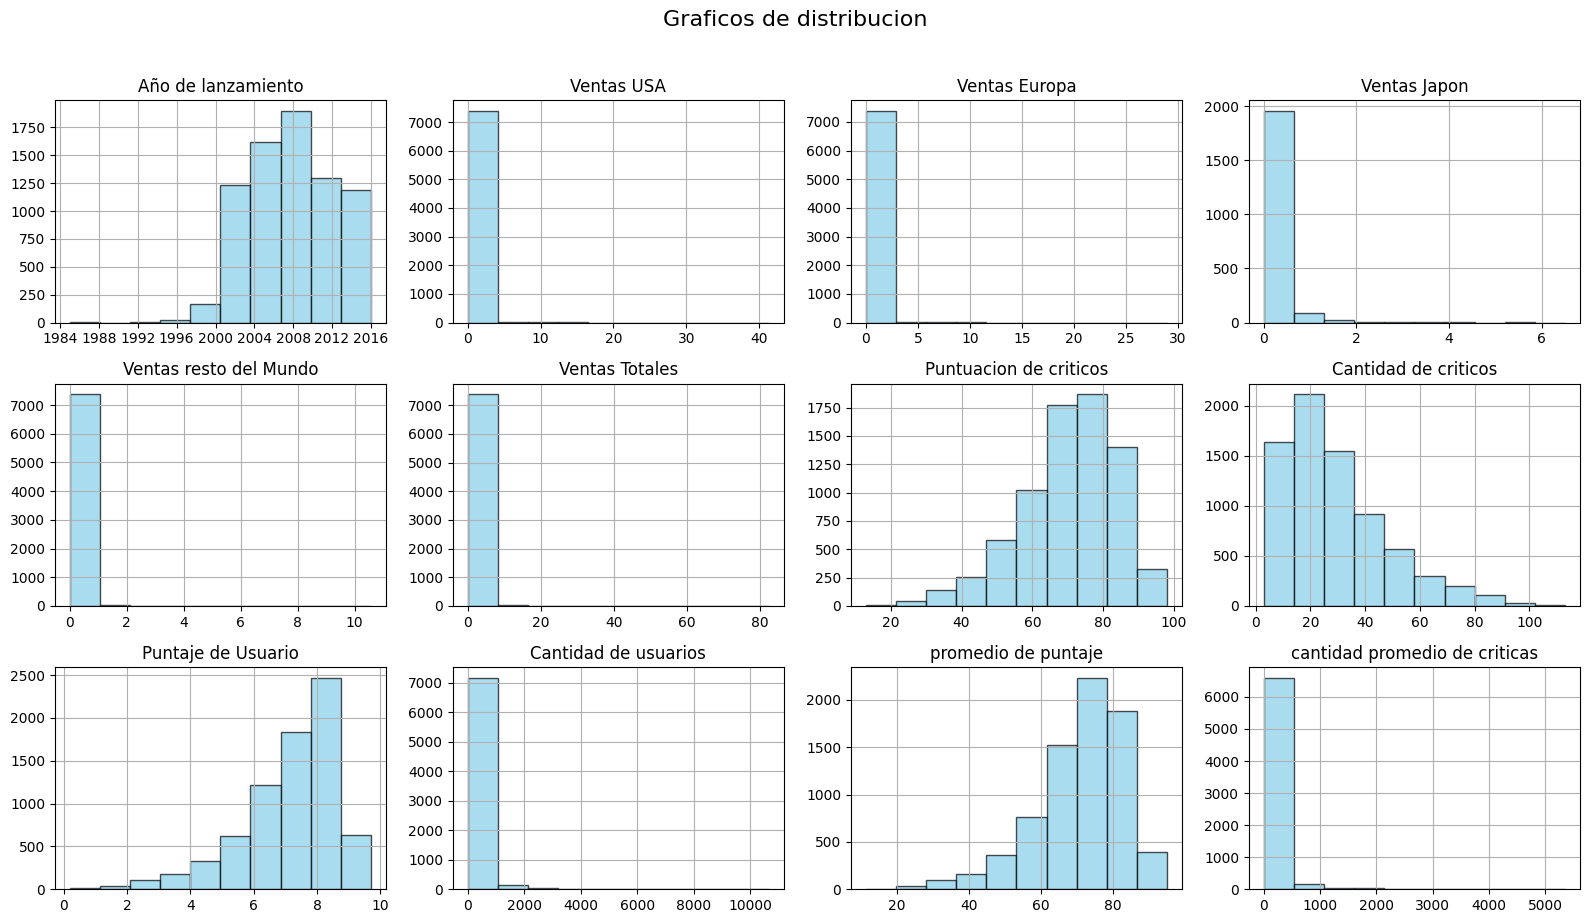

In [151]:
generar_hist(df_imputed)

# PUNTUACION SEGUN LA CRITICA

In [ ]:
##PUNTUACION SEGUN LA CRITICA PARA PUBLICADOR, DESARROLLADOR Y JUEGO

#PUBLICADOR con los juegos con mayor, menor y el promedio de puntos segun la critica en orden descendente
pje_cri_publicador = df.loc[(df['Puntuacion de criticos'] > 0) & (df['Publicador'])].groupby('Publicador').agg({'Puntuacion de criticos':['mean','min','max','count']})
pje_cri_publicador = pje_cri_publicador.sort_values(by=('Puntuacion de criticos','mean'), ascending=False)
print(f"\n\n{'TOP 10 DE LOS PUBLICADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_publicador.head(10))

#DESARROLLADOR con los juegos con mayor, menor y el promedio de puntos segun la critica en orden descendente
pje_cri_desarrollador = df.loc[(df['Puntuacion de criticos'] > 0) & (df['Desarrollador'])].groupby('Desarrollador').agg({'Puntuacion de criticos':['mean','min','max','count']})
pje_cri_desarrollador = pje_cri_desarrollador.sort_values(by=('Puntuacion de criticos','mean'), ascending=False)
print(f"\n\n{'TOP 10 DE LOS DESARROLLADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_desarrollador.head(10))

##JUEGOS con mayor puntuacion segun la critica
pje_cri_juegos = df[['Puntuacion de criticos','Juego','Publicador','Año de lanzamiento']]
pje_cri_juegos_desc = pje_cri_juegos.sort_values(by='Puntuacion de criticos', ascending=False)
print(f"\n\n{'TOP 10 DE LOS JUEGOS CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA'}\n\n",pje_cri_juegos_desc.head(10))##




TOP 10 DE LOS PUBLICADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA

                        Puntuacion de criticos                  
                                         mean   min   max count
Publicador                                                     
Valve                                   95.00  95.0  95.0     1
Valve Software                          93.00  89.0  95.0     3
Blue Byte                               91.00  91.0  91.0     1
Graphsim Entertainment                  90.00  90.0  90.0     1
Number None                             90.00  90.0  90.0     1
2D Boy                                  90.00  90.0  90.0     1
Psygnosis                               89.75  86.0  93.0     4
Square                                  89.00  89.0  89.0     1
Havas Interactive                       88.00  88.0  88.0     1
Devolver Digital                        88.00  88.0  88.0     1


TOP 10 DE LOS DESARROLLADORES CON EL PROMEDIO MAS ALTO SEGUN LAS CRITICA

                  

GRAFICO TOP 10 JUEGOS SEGUN LA CRITICA

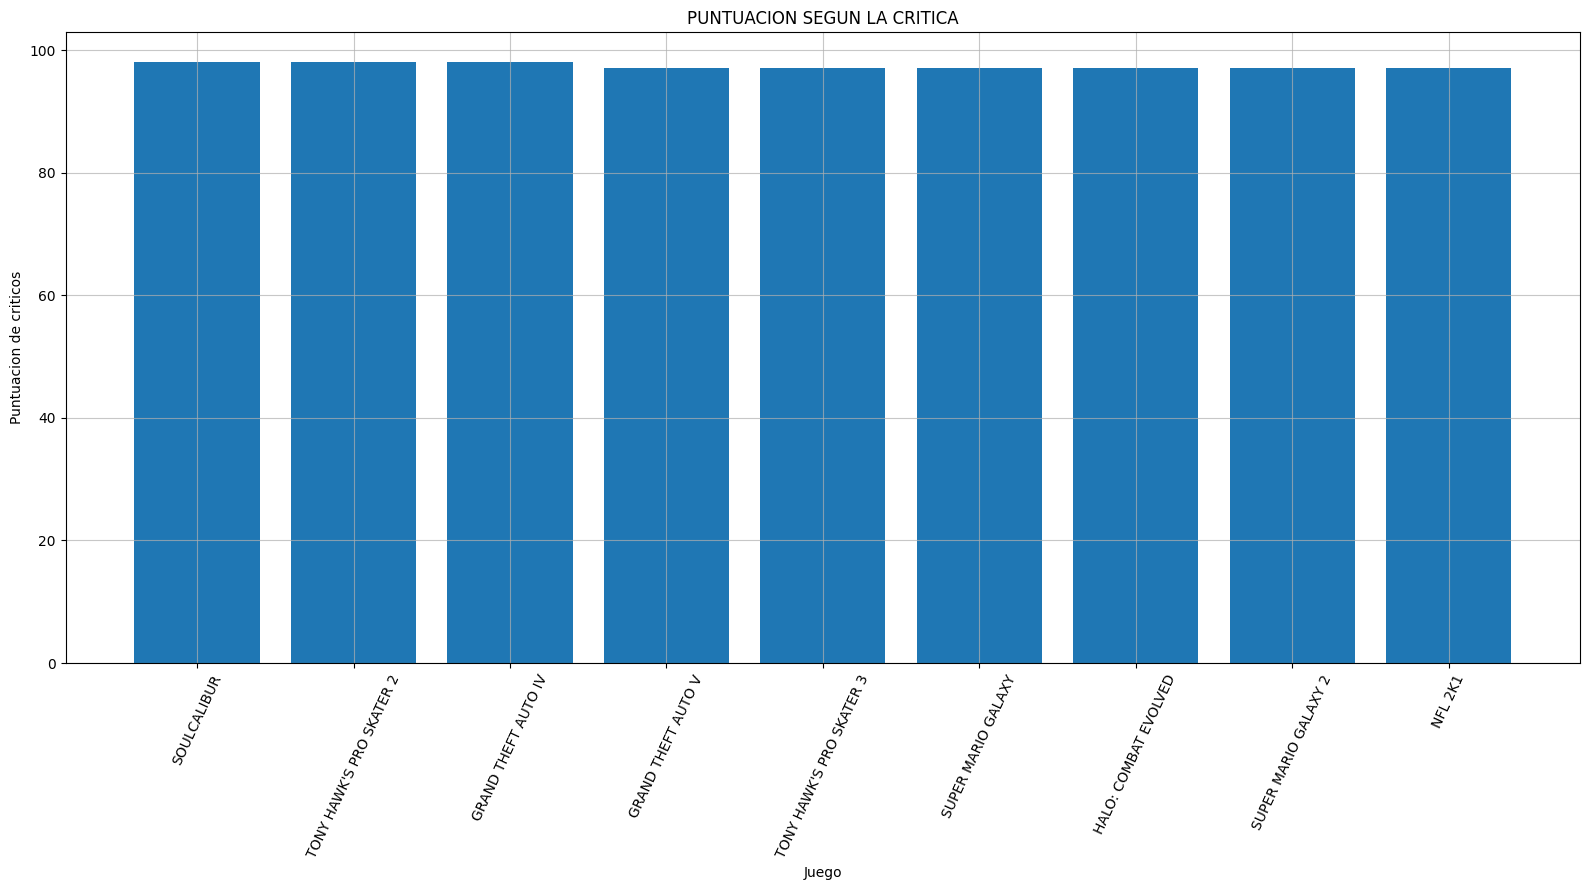

In [ ]:
top_10_juegos_critica = df.sort_values(by='Puntuacion de criticos', ascending=False).head(10)

plt.figure(figsize= (16,9))

plt.bar(
      top_10_juegos_critica['Juego'],
      top_10_juegos_critica['Puntuacion de criticos']

      )

plt.title('PUNTUACION SEGUN LA CRITICA')
plt.xlabel('Juego')
plt.ylabel('Puntuacion de criticos')
plt.xticks(rotation=65) # Rotate x-axis labels for better readability
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
print(df.dtypes)

Juego                             object
Consola                           object
Año de lanzamiento                 int64
Genero                            object
Publicador                        object
Ventas USA                       float64
Ventas Europa                    float64
Ventas Japon                     float64
Ventas resto del Mundo           float64
Ventas Totales                   float64
Puntuacion de criticos           float64
Cantidad de criticos             float64
Puntaje de Usuario               float64
Cantidad de usuarios               int64
Desarrollador                     object
Clasificacion por Edad            object
promedio de puntaje              float64
cantidad promedio de criticas    float64
dtype: object


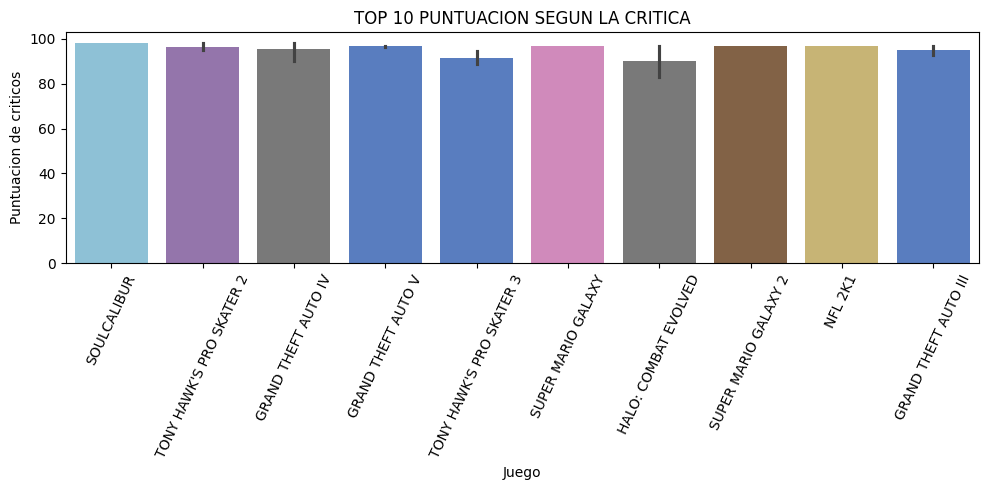

In [ ]:
plt.figure(figsize= (10,5))

sns.barplot(x='Juego', y= 'Puntuacion de criticos', data= df, hue='Juego', palette='muted',legend=False, order=df.sort_values('Puntuacion de criticos', ascending=False)['Juego'].head(12))

plt.title('TOP 10 PUNTUACION SEGUN LA CRITICA')
plt.xlabel('Juego')
plt.ylabel('Puntuacion de criticos')
plt.xticks(rotation=65)

plt.tight_layout()
plt.show()

# PUNTUACION SEGUN USUARIOS

In [ ]:
##PUNTUACION SEGUN LOS USUARIOS PARA PUBLICADOR, DESARROLLADOR Y JUEGO

#PUBLICADOR con los juegos con mayor, menor y el promedio de puntos segun los usuarios en orden descendente
pje_usu_publicador = df.loc[(df['Puntaje de Usuario'] > 0) & (df['Publicador'])].groupby('Publicador').agg({'Puntaje de Usuario':['mean','min','max','count']})
pje_usu_publicador = pje_usu_publicador.sort_values(by=('Puntaje de Usuario','mean'), ascending=False)
print(f"\n\n{'TOP 10 DE LOS PUBLICADORES CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_publicador.head(10))

#DESARROLLADOR con los juegos con mayor, menor y el promedio de puntos segun los usuarios en orden descendente
pje_usu_desarrollador = df.loc[(df['Puntaje de Usuario'] > 0) & (df['Desarrollador'])].groupby('Desarrollador').agg({'Puntaje de Usuario':['mean','min','max','count']})
pje_usu_desarrollador = pje_usu_desarrollador.sort_values(by=('Puntaje de Usuario','mean'), ascending=False)
print(f"\n\n{'TOP 10 DE LOS DESARROLLADORES CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_desarrollador.head(10))

##JUEGOS con mayor puntuacion segun los usuarios
pje_usu_juegos = df[['Puntaje de Usuario','Juego','Publicador','Año de lanzamiento']]
pje_usu_juegos_desc = pje_usu_juegos.sort_values(by='Puntaje de Usuario', ascending=False)
print(f"\n\n{'TOP 10 DE LOS JUEGOS CON EL PROMEDIO MAS ALTO SEGUN LOS USUARIOS'}\n\n",pje_usu_juegos_desc.head(10))



Grafico top 10 juegos segun usuarios

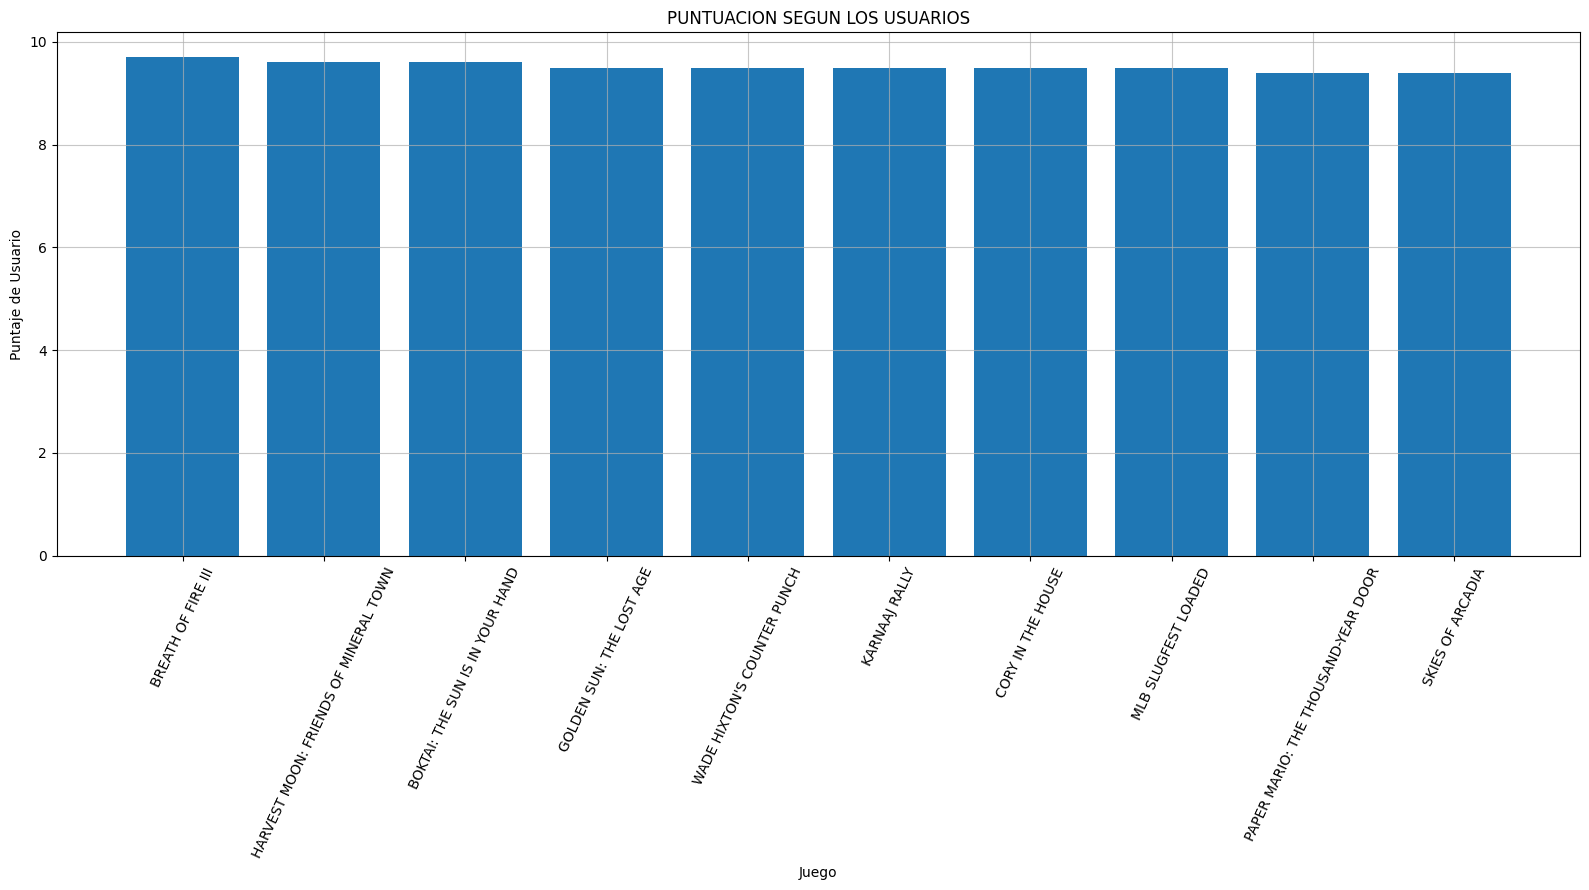

In [ ]:

top_10_juegos_usuarios = df.sort_values(by='Puntaje de Usuario', ascending=False).head(10)



plt.figure(figsize= (16,9))

plt.bar(
      top_10_juegos_usuarios['Juego'],
      top_10_juegos_usuarios['Puntaje de Usuario']

      )

plt.title('PUNTUACION SEGUN LOS USUARIOS')
plt.xlabel('Juego')
plt.ylabel('Puntaje de Usuario')
plt.xticks(rotation=65) # Rotate x-axis labels for better readability
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# PUNTUACION TOTAL (promedio de puntajes dados entre usuarios y la critica)

In [ ]:
##DESARROLLADOR con mayor puntuacion Total

promedio_des_pje = df.loc[df[('promedio de puntaje')].notna() & (df['Desarrollador'].notna())].groupby('Desarrollador').agg({'promedio de puntaje':['max']})
promedios_des_pje = promedio_des_pje.sort_values(by=('promedio de puntaje','max'), ascending=False)
print(f"\n\n{'Puntuacion total de los Desarrolladores'}\n\n",promedios_des_pje.head(10))

promedio_pub_pje = df.loc[df[('promedio de puntaje')].notna() & (df['Publicador'].notna())].groupby('Publicador').agg({'promedio de puntaje':['max']})
promedios_pub_pje = promedio_pub_pje.sort_values(by=('promedio de puntaje','max'), ascending=False)
print(f"\n\n{'Puntuacion total de los Publicadores'}\n\n",promedios_pub_pje.head(10))

promedio_pje_juego = df.loc[df[('promedio de puntaje')].notna() & (df['Juego'].notna())].groupby('Juego').agg({'promedio de puntaje':['max']})
promedios_pub_juegos = promedio_pje_juego.sort_values(by=('promedio de puntaje','max'), ascending=False)
print(f"\n\n{'Puntuacion total de los Juegos'}\n\n",promedios_pub_juegos.head(10))





Puntuacion total de los Desarrolladores

                    promedio de puntaje
                                   max
Desarrollador                         
Capcom                            95.0
Retro Studios                     95.0
Valve Software                    94.5
Nintendo                          94.0
Nintendo EAD Tokyo                94.0
KCEJ                              94.0
Konami                            93.5
Namco                             93.5
Aspect                            93.5
Overworks                         93.5


Puntuacion total de los Publicadores

                                    promedio de puntaje
                                                   max
Publicador                                            
Capcom                                            95.0
Nintendo                                          95.0
Electronic Arts                                   94.5
Konami Digital Entertainment                      94.0
Sega                   

Grafico de puntuacion total

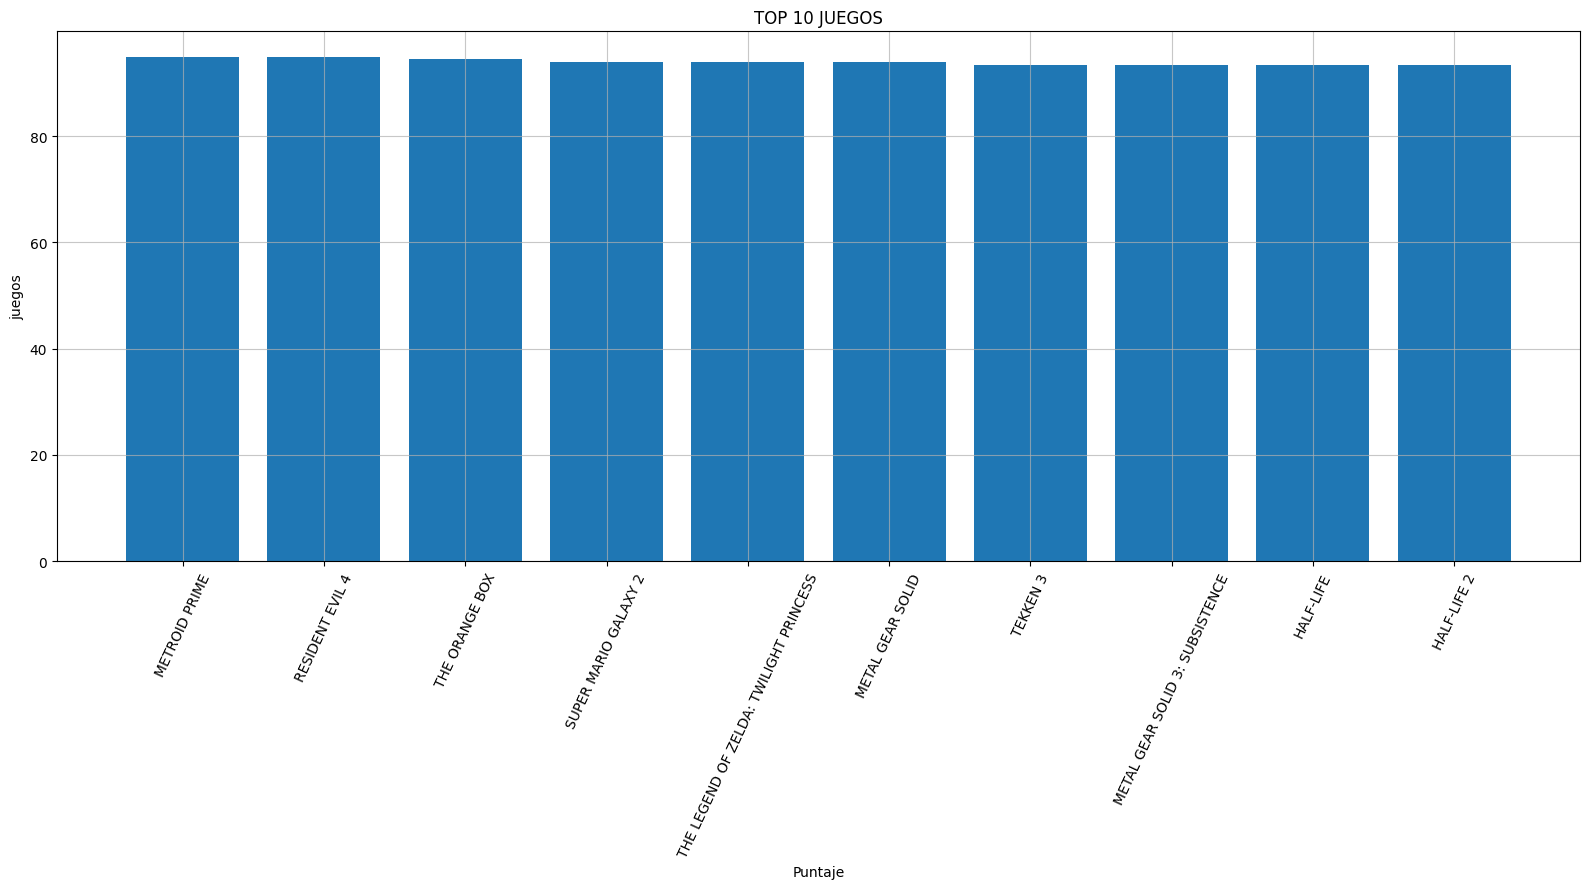

In [ ]:
top_10_juegos_promedio = df.sort_values(by='promedio de puntaje', ascending=False).head(10)

plt.figure(figsize= (16,9))

plt.bar(
  top_10_juegos_promedio['Juego'],
  top_10_juegos_promedio['promedio de puntaje']

)

plt.title('TOP 10 JUEGOS')
plt.xlabel('Puntaje')
plt.ylabel('juegos')
plt.xticks(rotation=65)
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# LOS GENERO CON MAS VENTAS POR CONSOLA

In [ ]:
##GENEROS DE JUEGOS MAS VENDIDO

genero = df.groupby('Genero')['Ventas Totales'].sum()
genero_redondeo = round(genero)
generos = genero_redondeo.sort_values(ascending=False)
print(f"\n\n{'Genero de juegos mas vendidos'}\n\n",generos)


##TOP DE LOS GENEROS DE JUEGOS CON MAYOR PUNTAJE PROMEDIO(critica + usuarios)

puntaje_genero = df.loc[df[('promedio de puntaje')].notna() & (df['Genero'].notna())].groupby('Genero').agg({'promedio de puntaje':['mean']})
puntaje_genero = puntaje_genero.sort_values(by=('promedio de puntaje','mean'), ascending=False)
print(F"\n\n{'Top de los generos con el mayor puntaje promedio'}\n\n",puntaje_genero)



Genero de juegos mas vendidos

 Genero
Accion        1263.0
Deportes       900.0
Disparos       836.0
RPG            506.0
Carreras       488.0
Miscelania     435.0
Plataforma     385.0
Lucha          255.0
Simulacion     221.0
Aventura        95.0
Puzzle          80.0
Estrategia      78.0
Name: Ventas Totales, dtype: float64


Top de los generos con el mayor puntaje promedio

            promedio de puntaje
                          mean
Genero                        
RPG                  74.514025
Estrategia           72.877289
Deportes             72.524711
Plataforma           72.018844
Puzzle               71.601695
Lucha                71.357520
Simulacion           70.950331
Disparos             70.908459
Carreras             70.364334
Accion               69.429878
Aventura             68.988372
Miscelania           67.909326


GRAFICO DE GENEROS MAS VENDIDOS POR CONSOLA

```
# Tiene formato de código
```



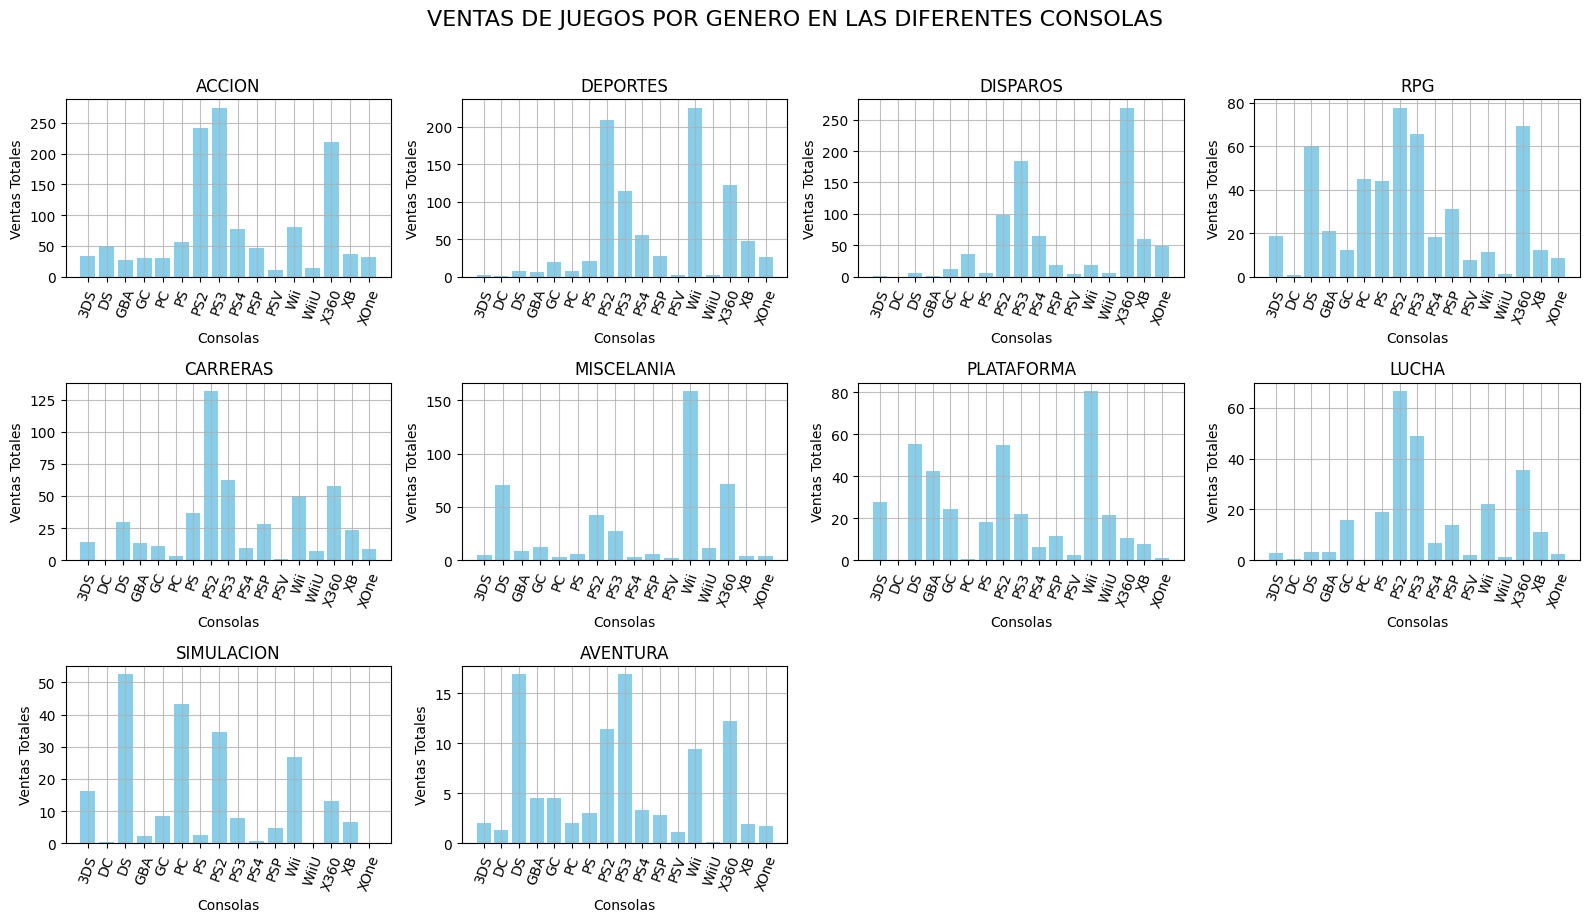

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 9 ))
axes = axes.flatten()

# Agarra el top 15 de las genero con el mayor puntaje promedio
top_genero = df.loc[df['Ventas Totales'].notna()].groupby('Genero')['Ventas Totales'].sum().sort_values(ascending=False).head(10).index

for i, genero in enumerate(top_genero):
    ax = axes[i]
    # Filtra los generos por los años
    genero_puntaje_año = df[df['Genero'] == genero].groupby('Consola')['Ventas Totales'].sum()
    ax.bar(genero_puntaje_año.index, genero_puntaje_año.values, color='skyblue') # Changed color to skyblue for consistency
    ax.set_title(genero.upper())
    ax.set_xlabel('Consolas')
    ax.set_ylabel('Ventas Totales')
    ax.grid(True, alpha=0.8)
    rotacion= 70
    ax.set_xticks(range(len(genero_puntaje_año.index)))
    ax.set_xticklabels(genero_puntaje_año.index, rotation=rotacion)

    # Oculta cualquier subplot que no se use
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle('GENEROS MAS VENDIDOS POR CONSOLA', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
## EL AÑO EN QUE SE VENDIO MAS JUEGOS POR CONSOLA

pcva = df.groupby('Consola')['Año de lanzamiento'].mean()
pcva_redondeo = round(pcva)
##print(f"\n\n{'Año que se vendio mas juegos por consola'}\n\n",pcva_redondeo)

##TOTAL DE JUEGOS VENDIDOS POR CONSOLA

cma = df.groupby('Consola')['Ventas Totales'].sum()
cma = cma.sort_values(ascending=False)
cma_redondeo = round(cma)
##print(f"\n\n{'Suma total de los juegos vendidos por consola'}\n\n",cma_redondeo,f"\n\n{'**El punto marca el millon*'}*")


# EVALUACION SEGUN LAS VENTAS POR REGION Y MUNDIAL

In [ ]:

##JUEGOS CON MAYORES VENTAS POR REGION Y MUNDIAL

ventas_usa = df[['Ventas USA','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_usa = ventas_usa.sort_values(by='Ventas USA', ascending=False)

ventas_euro = df[['Ventas Europa','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_euro = ventas_euro.sort_values(by='Ventas Europa', ascending=False)

ventas_japon= df[['Ventas Japon','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_japon = ventas_japon.sort_values(by='Ventas Japon', ascending=False)

ventas_resto = df[['Ventas resto del Mundo','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_resto = ventas_resto.sort_values(by='Ventas resto del Mundo', ascending=False)

ventas_total= df[['Ventas Totales','Juego','Publicador','Desarrollador','Año de lanzamiento']]
venta_total = ventas_total.sort_values(by='Ventas Totales', ascending=False)

##DESARROLLADORES CON MAYORES VENTAS REGION Y MUNDIAL

venta_des_usa = df.groupby('Desarrollador')['Ventas USA'].sum()
ventas_des_usa = venta_des_usa.sort_values(ascending=False)

venta_des_euro = df.groupby('Desarrollador')['Ventas Europa'].sum()
ventas_des_euro = venta_des_euro.sort_values(ascending=False)

venta_des_japon = df.groupby('Desarrollador')['Ventas Japon'].sum()
ventas_des_japon = venta_des_japon.sort_values(ascending=False)

venta_des_resto = df.groupby('Desarrollador')['Ventas resto del Mundo'].sum()
ventas_des_resto = venta_des_resto.sort_values(ascending=False)

venta_des_total = df.groupby('Desarrollador')['Ventas Totales'].sum()
ventas_des_total = venta_des_total.sort_values(ascending=False)

##PUBLICADORES CON MAYORES VENTAS REGION Y MUNDIAL

venta_pub_usa = df.groupby('Publicador')['Ventas USA'].sum()
ventas_pub_usa = venta_pub_usa.sort_values(ascending=False)

venta_pub_euro = df.groupby('Publicador')['Ventas Europa'].sum()
ventas_pub_euro = venta_pub_euro.sort_values(ascending=False)

venta_pub_japon = df.groupby('Publicador')['Ventas Japon'].sum()
ventas_pub_japon = venta_pub_japon.sort_values(ascending=False)

venta_pub_resto = df.groupby('Publicador')['Ventas resto del Mundo'].sum()
ventas_pub_resto = venta_pub_resto.sort_values(ascending=False)

venta_pub_total = df.groupby('Publicador')['Ventas Totales'].sum()
ventas_pub_total = venta_pub_total.sort_values(ascending=False)


##REGIONES:

##ESTADOS UNIDOS
print(f"\n\n{'VENTAS EN ESTADOS UNIDOS'}\n\n")
print(f"\n\n{'Top 10 de los juegos mas vendidos en Estados Unidos'}\n\n",venta_usa.head(10))
print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Estados unidos'}\n\n",ventas_des_usa.head(10))
print(f"\n\n{'Top 10 de los publicadores con mas ventas en Estados unidos'}\n\n",ventas_pub_usa.head(10))

##EUROPA
print(f"\n\n{'VENTAS EN EUROPA'}\n\n")
print(f"\n\n{'Top 10 de los juegos mas vendidos en Europa'}\n\n",venta_euro.head(10))
print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Europa'}\n\n",ventas_des_euro.head(10))
print(f"\n\n{'Top 10 de los publicadores con mas ventas en Europa'}\n\n",ventas_pub_euro.head(10))

##JAPON
print(f"\n\n{'VENTAS EN JAPON'}\n\n")
print(f"\n\n{'Top 10 de los juegos mas vendidos en Japon'}\n\n",venta_japon.head(10))
print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en Japon'}\n\n",ventas_des_japon.head(10))
print(f"\n\n{'Top 10 de los publicadores con mas ventas en Japon'}\n\n",ventas_pub_japon.head(10))

##RESTO DEL MUNDO
print(f"\n\n{'VENTAS EN RESTO DEL MUNDO'}\n\n")
print(f"\n\n{'Top 10 de los juegos con mas ventas en el resto del mundo'}\n\n",venta_resto.head(10))
print(f"\n\n{'Top 10 de los Desarrolladores con mas ventas en el resto del mundo'}\n\n",ventas_des_resto.head(10))
print(f"\n\n{'Top 10 de los publicadores con mas ventas en el resto del Mundo'}\n\n",ventas_pub_resto.head(10))

##MUNDIAL
print(f"\n\n{'VENTAS EN EL MUNDO'}\n\n")
print(f"\n\n{'Top 10 de los juegos mas vendidos en el mundo'}\n\n",venta_total.head(10))
print(f"\n\n{'Top 10 de los desarrolladores con mas ventas en el Mundo'}\n\n",ventas_des_total.head(10))
print(f"\n\n{'Top 10 de los publicadores con mas ventas en el Mundo'}\n\n",ventas_pub_total.head(10))






VENTAS EN ESTADOS UNIDOS




Top 10 de los juegos mas vendidos en Estados Unidos

     Ventas USA                      Juego              Publicador  \
0        41.36                 WII SPORTS                Nintendo   
1        15.68             MARIO KART WII                Nintendo   
2        15.61          WII SPORTS RESORT                Nintendo   
8        15.00         KINECT ADVENTURES!  Microsoft Game Studios   
5        14.44  NEW SUPER MARIO BROS. WII                Nintendo   
4        13.96                   WII PLAY                Nintendo   
3        11.28      NEW SUPER MARIO BROS.                Nintendo   
6         9.71              MARIO KART DS                Nintendo   
18        9.70    CALL OF DUTY: BLACK OPS              Activision   
13        9.66         GRAND THEFT AUTO V    Take-Two Interactive   

          Desarrollador  Año de lanzamiento  
0              Nintendo                2006  
1              Nintendo                2008  
2              Ni

TOP 10 DE JUEGOS MAS VENDIDOS POR REGION

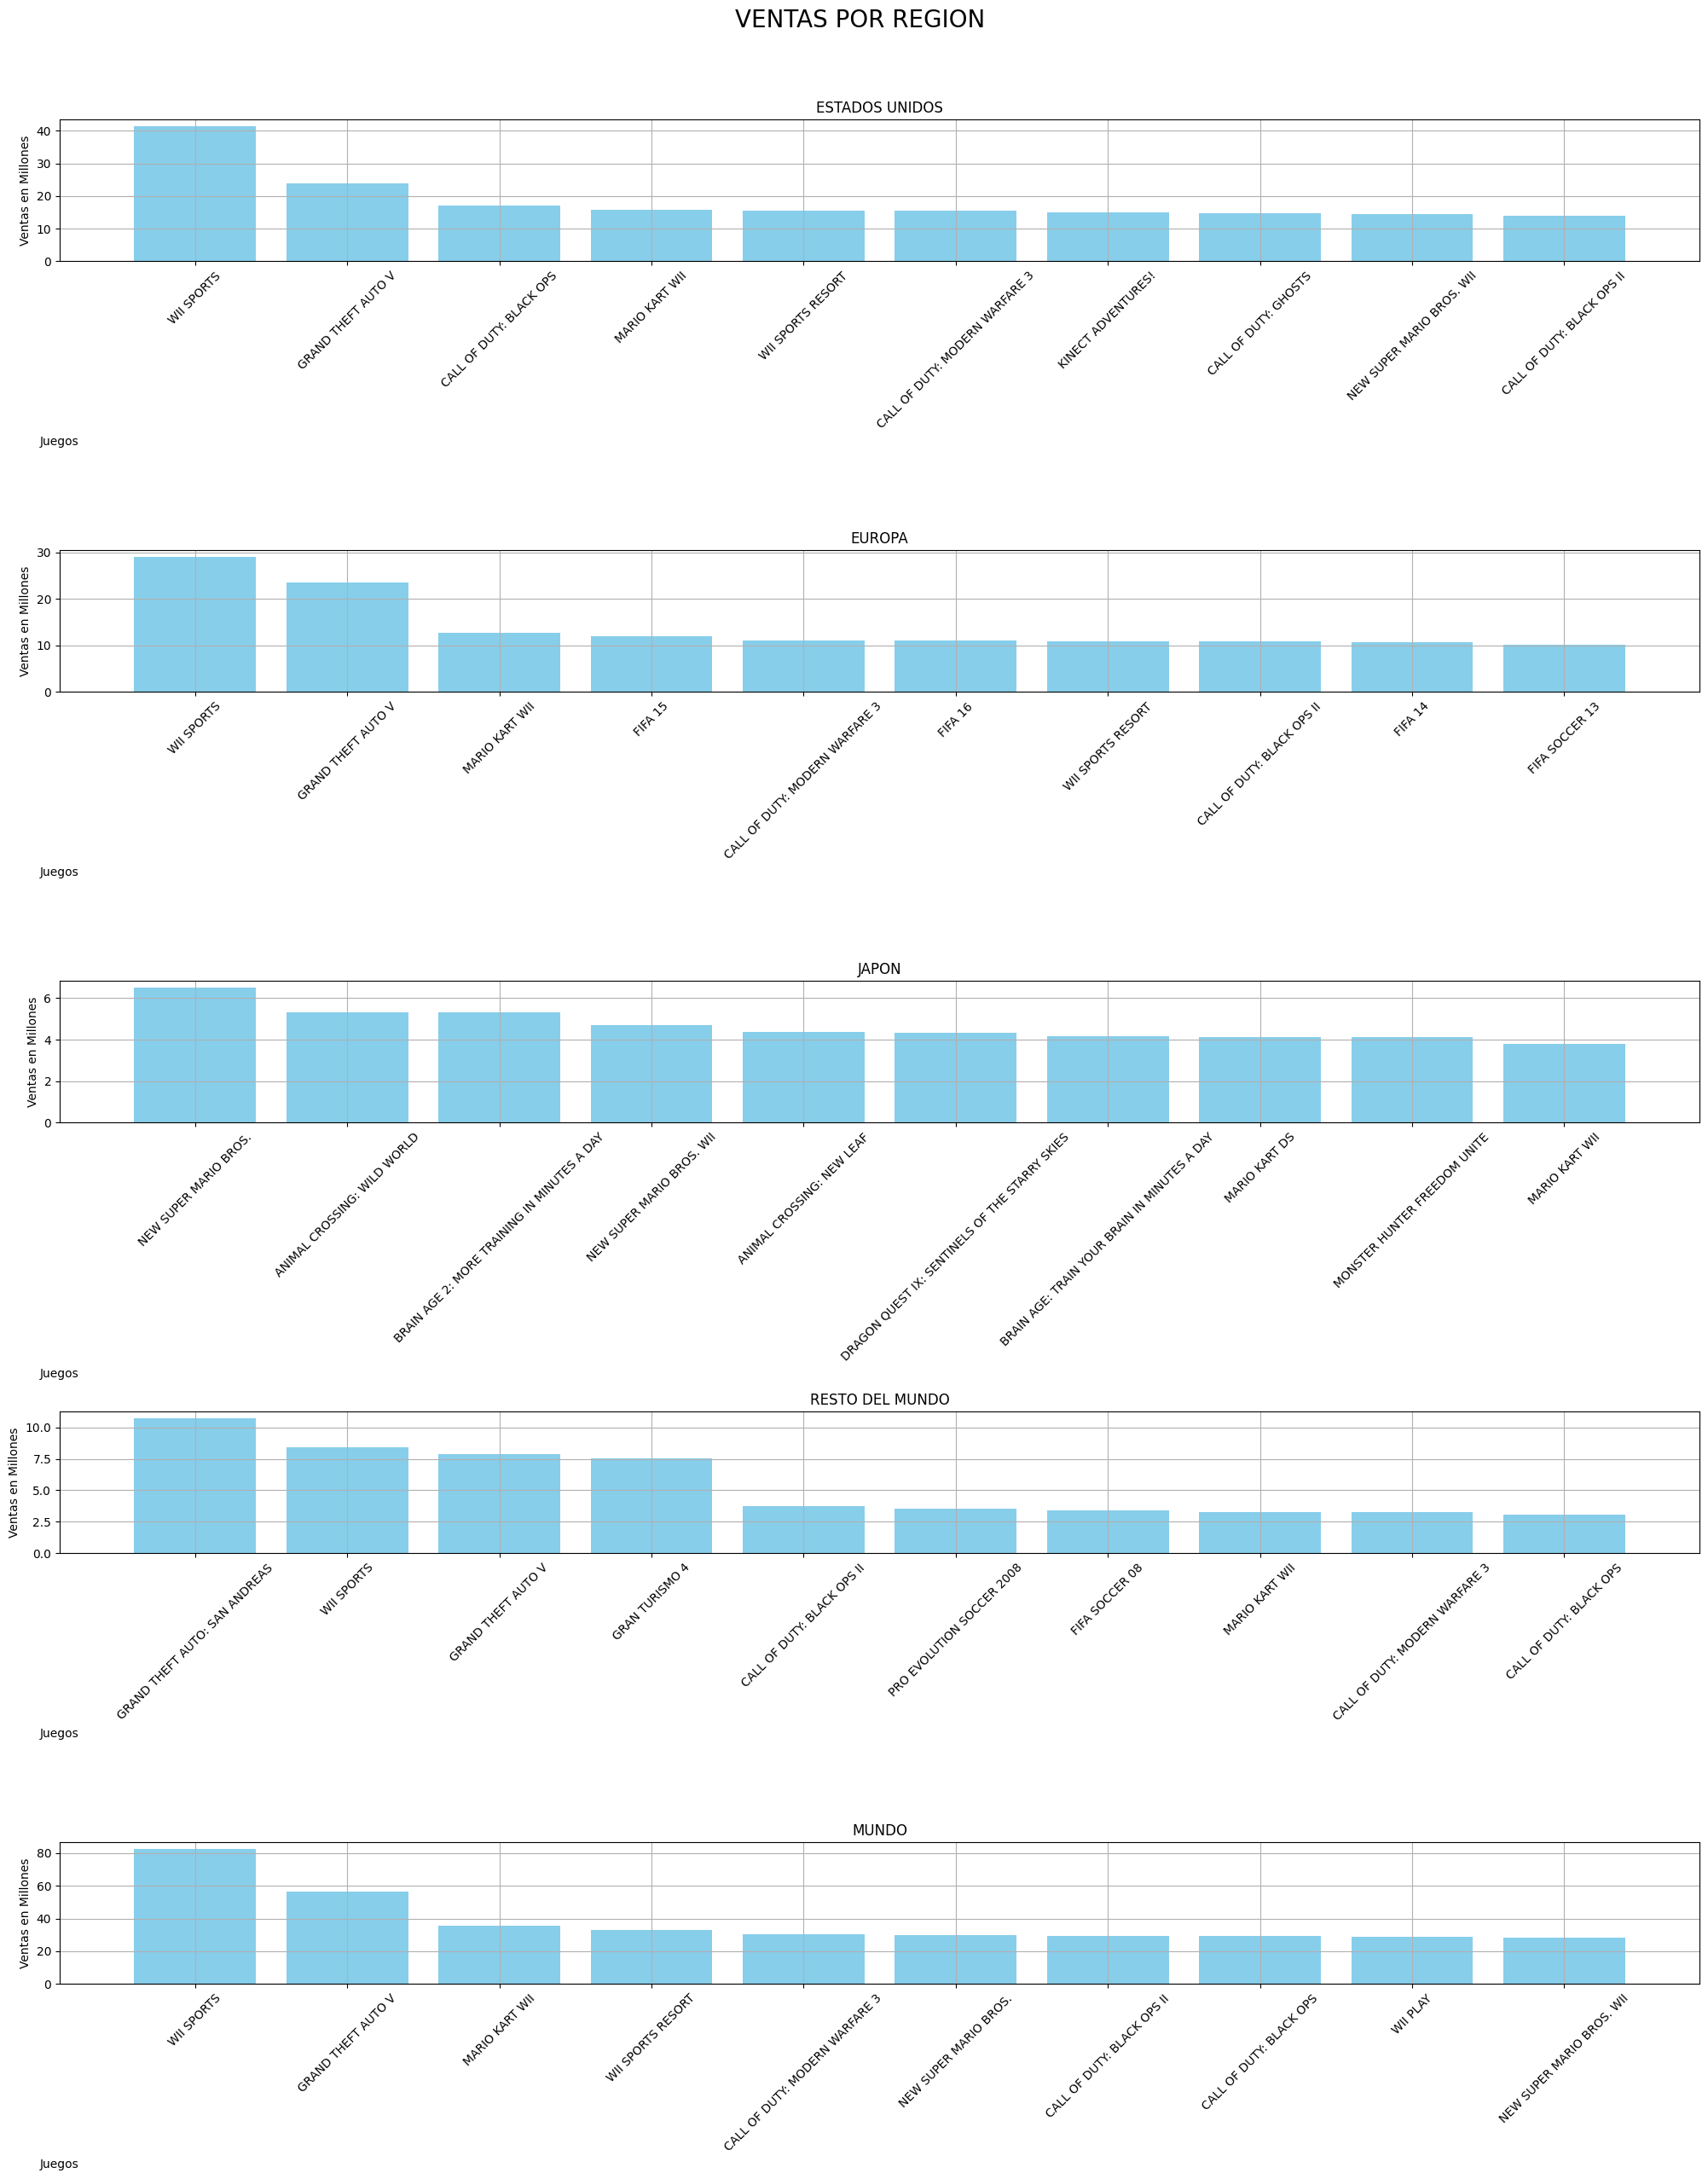

In [ ]:
fig, axes = plt.subplots( 5,1, figsize= (20,25))


region = ['Ventas USA','Ventas Europa','Ventas Japon','Ventas resto del Mundo','Ventas Totales']
region_names = ['Estados Unidos', 'Europa', 'Japon', 'Resto del Mundo', 'Mundo']


for i, ax in enumerate(axes):
    top_genero = df.loc[df[region[i]].notna()].groupby('Juego')[region[i]].sum().sort_values(ascending=False).head(10).index
    venta = df.loc[df[region[i]].notna()].groupby('Juego')[region[i]].sum().sort_values(ascending=False).head(10).values
    ax.bar(top_genero,venta, color='skyblue')
    ax.set_title(region_names[i].upper())
    ax.set_xlabel('Juegos',x=0, y=1.1)
    ax.set_ylabel('Ventas en Millones')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=1)







plt.suptitle('VENTAS POR REGION', fontsize=20,  y=1.02)
plt.tight_layout()
plt.show()

# Conclusiones Preliminares

Las conclusiones que puedo realizar hasta ahora despues de haber generado los graficos es que los juegos mejor puntuados que segun el dataframe
son los RPG, no son los mas vendidos, la mayoria de los jugadores de videojuegos tienden a elegir los juegos de deportes o miscelaneas.
Otra conclusion es que la evaluacion de los puntajes entre los usuarios y los criticos hacia los juegos difieren en el top 10 realizado
Primera teoria que me genera es que la mayoria de la poblacion de jugadores les gusta mas los juegos multiplayer, que los juego singleplayer.
Aunque no se cumple en todas las regiones, por ejemplo en la region de Japon y el resto del mundo eligen otras preferencias en su mayoria.

In [152]:

df_promedio_ventas_total = df[filtro_rango].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_total.sort_values(by='Ventas Totales',ascending=False).head()


,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2008-12-31,273.98,144.18,37.60,62.93,518.86
2009-12-31,244.89,146.96,34.41,56.03,482.33
2007-12-31,245.63,129.14,35.09,62.95,473.10
2010-12-31,219.61,134.20,25.37,46.14,425.49
2006-12-31,231.24,106.60,40.43,46.64,425.05


In [153]:

df_promedio_ventas_1 = df[filtro_rango_1].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_1.sort_values(by='Ventas Totales',ascending=False).head()





,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2004-12-31,175.23,83.76,22.74,42.30,324.05
2002-12-31,166.03,86.35,18.65,22.83,294.02
2003-12-31,147.38,77.59,17.28,20.10,262.58
2001-12-31,139.60,73.87,23.57,18.35,255.26
2000-12-31,39.58,25.46,11.38,5.55,81.92


In [154]:
df_promedio_ventas_2 = df[filtro_rango_2].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_2.sort_values(by='Ventas Totales',ascending=False).head()

,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2008-12-31,273.98,144.18,37.60,62.93,518.86
2009-12-31,244.89,146.96,34.41,56.03,482.33
2007-12-31,245.63,129.14,35.09,62.95,473.10
2006-12-31,231.24,106.60,40.43,46.64,425.05
2005-12-31,178.81,89.86,38.98,31.95,339.76


In [155]:
df_promedio_ventas_3 = df[filtro_rango_3].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_3.sort_values(by='Ventas Totales',ascending=False).head()

,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2010-12-31,219.61,134.20,25.37,46.14,425.49
2011-12-31,193.39,129.09,24.19,42.50,389.19
2012-12-31,138.49,102.28,27.75,32.52,301.02
2013-12-31,128.85,101.12,19.29,33.27,282.44
2014-12-31,103.23,97.82,15.67,29.11,245.79


In [227]:
# Crear la figura
fig = go.Figure()

# Añadir las líneas de ventas
fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas USA'],
    name='Ventas USA',
    line=dict(color='red', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas Europa'],
    name='Ventas Europa',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas Japon'],
    name='Ventas Japon',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas resto del Mundo'],
    name='Ventas resto del Mundo',
    line=dict(color='purple', width=2)
))

# Calcular promedios y máximos
promedio_ventas = df_promedio_ventas_total[['Ventas USA', 'Ventas Europa', 'Ventas Japon', 'Ventas resto del Mundo']].mean().mean()
max_ventas = df_promedio_ventas_total[['Ventas USA', 'Ventas Europa', 'Ventas Japon', 'Ventas resto del Mundo']].max().max()

# Añadir líneas horizontales para promedio y máximo
fig.add_hline(y=promedio_ventas,
              line_dash="dash",
              line_color="black",
              annotation_text=f'Promedio: {promedio_ventas:.2f}',
              annotation_position="right")

fig.add_hline(y=max_ventas,
              line_dash="dash",
              line_color="orange",
              annotation_text=f'Máximo: {max_ventas:.2f}',
              annotation_position="right")

# Configurar el layout
fig.update_layout(
    title={
        'text': 'VENTAS DE JUEGOS EN CADA REGION (2000-2014)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16, 'weight': 'bold'}
    },
    xaxis_title='Año',
    yaxis_title='Ventas en millones',
    xaxis=dict(tickangle=-45),
    yaxis=dict(range=[0, 300]),
    showlegend=True,
    width=1000,
    height=500,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Mostrar la figura
fig.show()

In [267]:
# fig, ax = plt.subplots(5,1,figsize=(16,9))
# fig.suptitle('VENTAS POR REGION (2000-2004)',fontsize=16, fontweight='bold')

# max_ventas = df_promedio_ventas_1[['Ventas USA']].max().max()
# promedio_ventas = df_promedio_ventas_1[['Ventas USA']].mean().mean()

# ax[0].plot(df_promedio_ventas_1['Ventas USA'], label='Ventas', color ='red', linestyle = '-')
# ax[0].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=1)
# ax[0].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)


# ax[0].set_ylim(0,200)
# ax[0].grid(alpha=0.9)
# ax[0].legend()
# ax[0].set_title('Ventas USA',fontweight='bold')


# promedio_ventas = df_promedio_ventas_1[['Ventas Europa']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Europa']].max().max()

# ax[1].plot(df_promedio_ventas_1['Ventas Europa'], label='Ventas', color ='orange', linestyle = '-')
# ax[1].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='black', linestyle='--', alpha=0.8)
# ax[1].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[1].set_ylabel('Ventas en millones', fontweight='bold')
# ax[1].set_ylim(0,100)
# ax[1].grid(alpha=0.9)
# ax[1].legend()
# ax[1].set_title('Ventas Europa',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas Japon']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Japon']].max().max()

# ax[2].plot(df_promedio_ventas_1['Ventas Japon'], label='Ventas', color ='green', linestyle = '-')
# ax[2].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[2].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[2].set_ylim(0,30)
# ax[2].grid(alpha=0.9)
# ax[2].legend()
# ax[2].set_title('Ventas Japon',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas resto del Mundo']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas resto del Mundo']].max().max()

# ax[3].plot(df_promedio_ventas_1['Ventas resto del Mundo'], label='Ventas', color ='green', linestyle = '-')
# ax[3].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[3].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[3].set_ylim(0,50)
# ax[3].grid(alpha=0.9)
# ax[3].legend()
# ax[3].set_title('Ventas resto del Mundo',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas Totales']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Totales']].max().max()

# ax[4].plot(df_promedio_ventas_1['Ventas Totales'], label='Ventas', color ='green', linestyle = '-')
# ax[4].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[4].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[4].set_xlabel('Año', fontweight='bold')
# ax[4].set_ylim(0,500)
# ax[4].grid(alpha=0.9)
# ax[4].legend()
# ax[4].set_title('Ventas Totales',fontweight='bold')


# plt.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

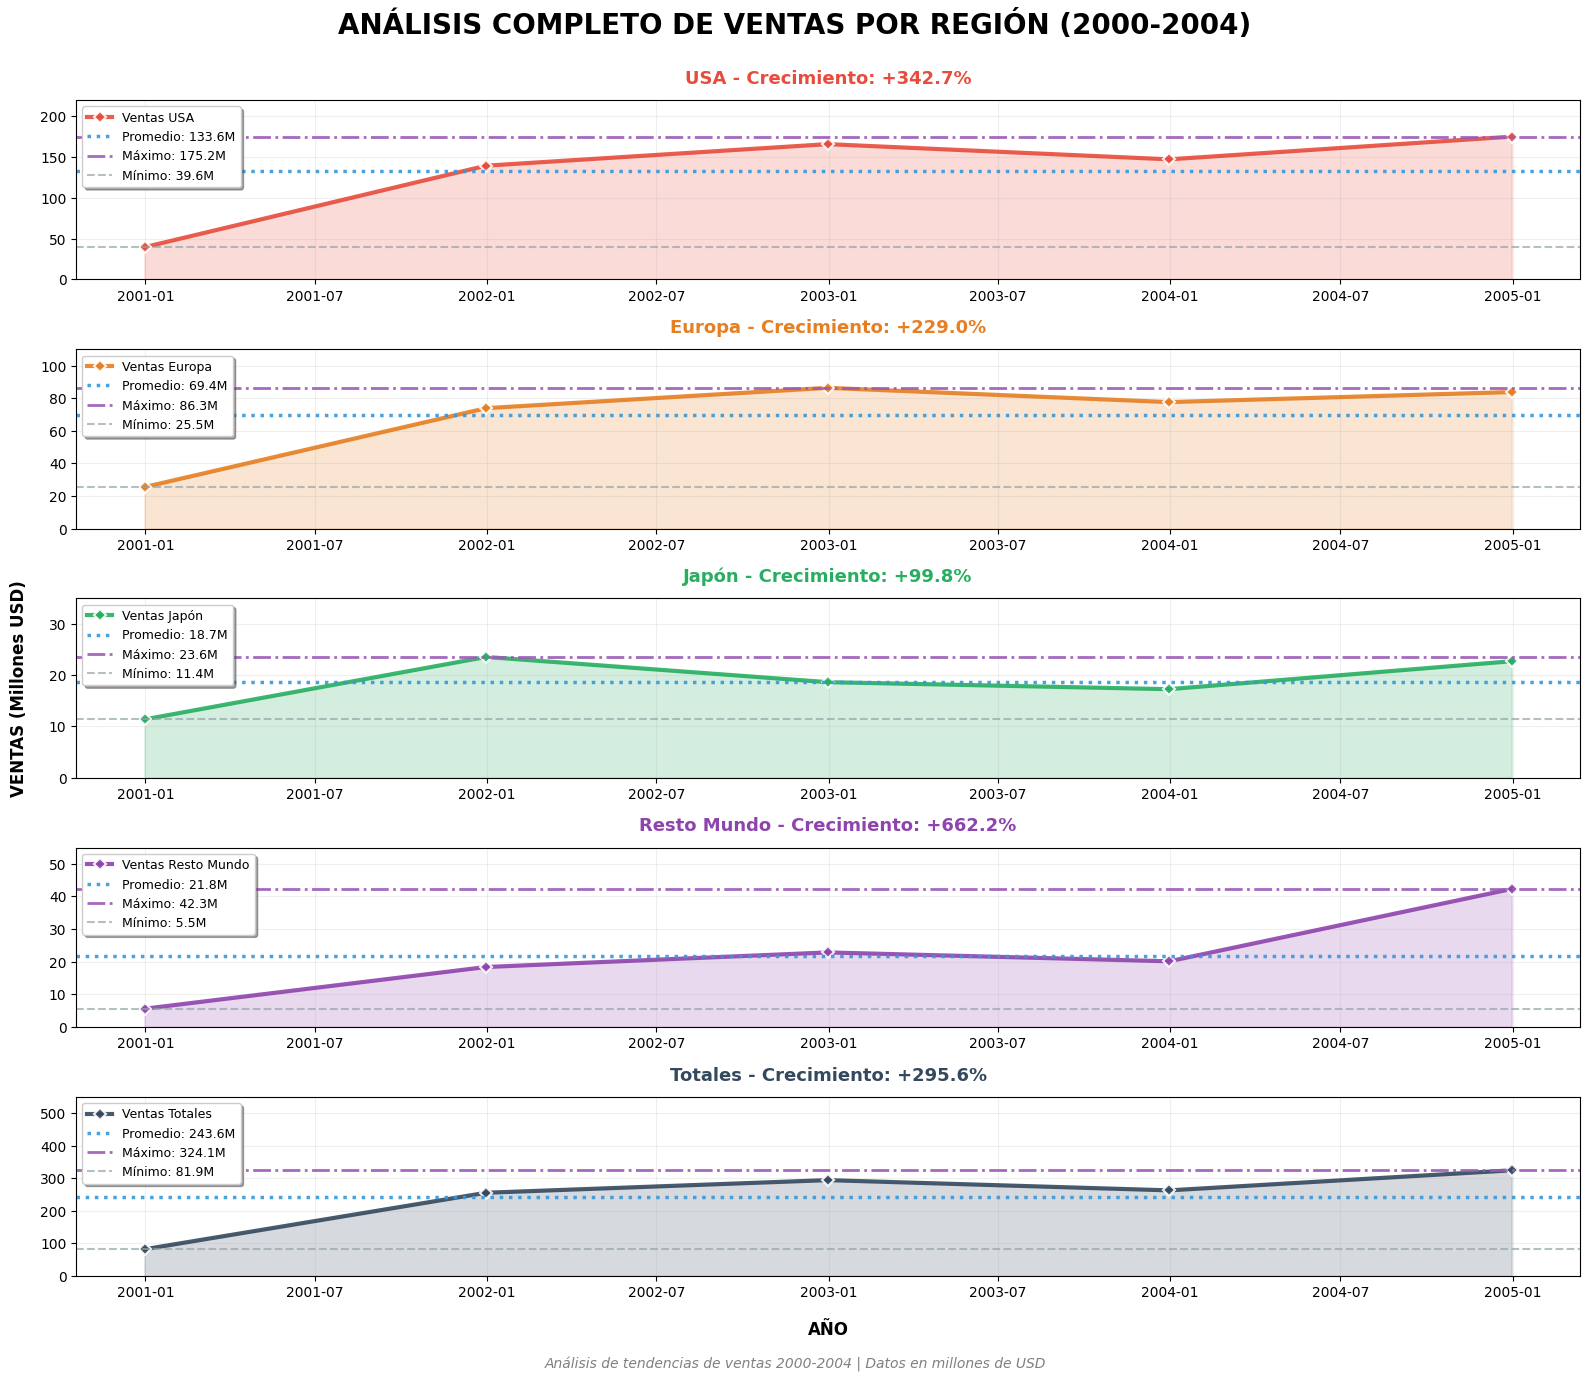

In [246]:
# Configuración profesional
fig, ax = plt.subplots(5, 1, figsize=(16, 14))
fig.suptitle('ANÁLISIS COMPLETO DE VENTAS POR REGIÓN (2000-2004)',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'ylim': (0, 220)},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'ylim': (0, 110)},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'ylim': (0, 35)},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'ylim': (0, 55)},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'ylim': (0, 550)}
}

for idx, (region, config) in enumerate(configuraciones.items()):
    data = df_promedio_ventas_1[config['col']]
    avg = data.mean()
    max_val = data.max()
    min_val = data.min()

    # Gráfico principal
    ax[idx].plot(data.index, data.values,
                 color=config['color'], linewidth=3, alpha=0.9,
                 marker='D', markersize=6, markeredgecolor='white', markeredgewidth=1.5,
                 label=f'Ventas {region}')

    # Líneas de referencia
    ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                   label=f'Promedio: {avg:.1f}M')
    ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                   label=f'Máximo: {max_val:.1f}M')
    ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                   label=f'Mínimo: {min_val:.1f}M')

    # Rellenar área bajo la curva
    ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

    # Configuración del subplot
    ax[idx].set_ylim(config['ylim'])
    ax[idx].set_title(f'{region} - Crecimiento: {((data.iloc[-1]-data.iloc[0])/data.iloc[0]*100):+.1f}%',
                     fontsize=13, fontweight='bold', pad=12, color=config['color'])
    ax[idx].legend(loc='upper left', frameon=True, fancybox=True, shadow=True, fontsize=9)
    ax[idx].grid(True, alpha=0.2, linestyle='-')

    # Ejes
    if idx == 2:
        ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12, fontweight='bold', labelpad=15)
    if idx == 4:
        ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

    # Estética de spines
    for spine in ax[idx].spines.values():
        spine.set_linewidth(0.8)

# Añadir anotación general
fig.text(0.5, 0.01, 'Análisis de tendencias de ventas 2000-2004 | Datos en millones de USD',
         ha='center', fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()

In [266]:
# fig, ax = plt.subplots(5,1,figsize=(16,9))
# fig.suptitle('VENTAS POR REGION (2005-2009)',fontsize=16, fontweight='bold')

# max_ventas = df_promedio_ventas_2[['Ventas USA']].max().max()
# promedio_ventas = df_promedio_ventas_2[['Ventas USA']].mean().mean()

# ax[0].plot(df_promedio_ventas_2['Ventas USA'], label='Ventas', color ='red', linestyle = '-')
# ax[0].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=1)
# ax[0].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)


# ax[0].set_ylim(0,400)
# ax[0].grid(alpha=0.9)
# ax[0].legend()
# ax[0].set_title('Ventas USA',fontweight='bold')


# promedio_ventas = df_promedio_ventas_2[['Ventas Europa']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Europa']].max().max()

# ax[1].plot(df_promedio_ventas_2['Ventas Europa'], label='Ventas', color ='orange', linestyle = '-')
# ax[1].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='black', linestyle='--', alpha=0.8)
# ax[1].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[1].set_ylabel('Ventas en millones', fontweight='bold')
# ax[1].set_ylim(0,200)
# ax[1].grid(alpha=0.9)
# ax[1].legend()
# ax[1].set_title('Ventas Europa',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas Japon']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Japon']].max().max()

# ax[2].plot(df_promedio_ventas_2['Ventas Japon'], label='Ventas', color ='green', linestyle = '-')
# ax[2].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[2].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[2].set_ylim(0,60)
# ax[2].grid(alpha=0.9)
# ax[2].legend()
# ax[2].set_title('Ventas Japon',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas resto del Mundo']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas resto del Mundo']].max().max()

# ax[3].plot(df_promedio_ventas_2['Ventas resto del Mundo'], label='Ventas', color ='green', linestyle = '-')
# ax[3].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[3].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[3].set_ylim(0,100)
# ax[3].grid(alpha=0.9)
# ax[3].legend()
# ax[3].set_title('Ventas resto del Mundo',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas Totales']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Totales']].max().max()

# ax[4].plot(df_promedio_ventas_2['Ventas Totales'], label='Ventas', color ='green', linestyle = '-')
# ax[4].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[4].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[4].set_xlabel('Año', fontweight='bold')
# ax[4].set_ylim(0,600)
# ax[4].grid(alpha=0.9)
# ax[4].legend()
# ax[4].set_title('Ventas Totales',fontweight='bold')


# plt.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

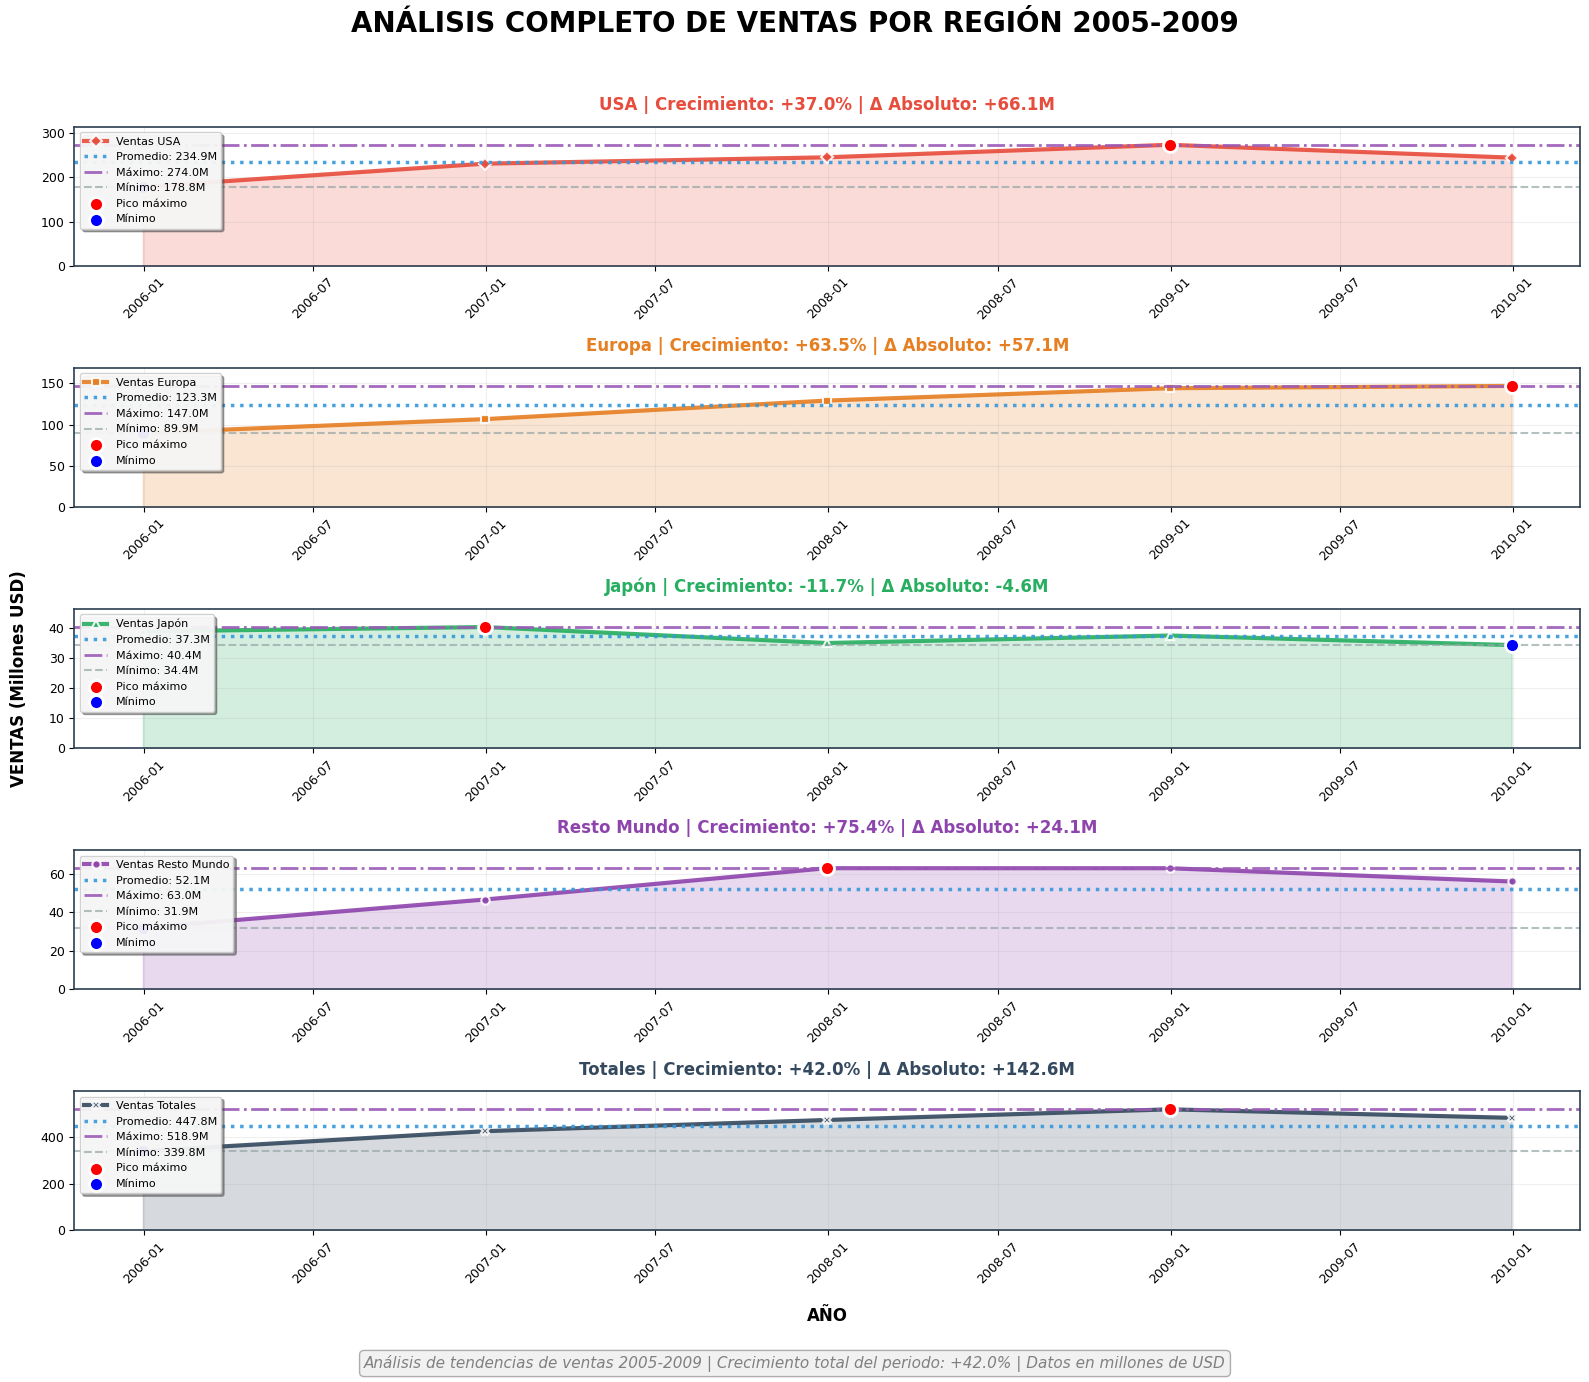

In [263]:
# CONFIGURACIÓN PROFESIONAL MEJORADA - VERSIÓN DINÁMICA
fig, ax = plt.subplots(5, 1, figsize=(16, 14))

# Obtener años disponibles dinámicamente
años_disponibles = df_promedio_ventas_2.index.tolist()
año_inicio = años_disponibles[0]
año_fin = años_disponibles[-1]
periodo = f"{año_inicio}-{año_fin}"

fig.suptitle(f'ANÁLISIS COMPLETO DE VENTAS POR REGIÓN 2005-2009',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada dinámica
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'marker': 'D'},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'marker': 's'},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'marker': '^'},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'marker': 'o'},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'marker': 'X'}
}

# Primero calcular límites Y dinámicamente
for region, config in configuraciones.items():
    if config['col'] in df_promedio_ventas_2.columns:
        data = df_promedio_ventas_2[config['col']]
        max_val = data.max()
        config['ylim'] = (0, max_val * 1.15)  # 15% de margen

for idx, (region, config) in enumerate(configuraciones.items()):
    try:
        if config['col'] not in df_promedio_ventas_2.columns:
            print(f"Advertencia: Columna {config['col']} no encontrada")
            continue

        data = df_promedio_ventas_2[config['col']]
        avg = data.mean()
        max_val = data.max()
        min_val = data.min()

        # Calcular métricas usando años disponibles
        valor_inicio = data.iloc[0]
        valor_fin = data.iloc[-1]
        crecimiento_absoluto = valor_fin - valor_inicio
        tasa_crecimiento = ((valor_fin - valor_inicio) / valor_inicio * 100) if valor_inicio != 0 else 0

        # Gráfico principal con marcadores diferenciados
        ax[idx].plot(data.index, data.values,
                     color=config['color'], linewidth=3, alpha=0.9,
                     marker=config['marker'], markersize=6,
                     markeredgecolor='white', markeredgewidth=1.5,
                     label=f'Ventas {region}')

        # Líneas de referencia mejoradas
        ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                       label=f'Promedio: {avg:.1f}M')
        ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                       label=f'Máximo: {max_val:.1f}M')
        ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                       label=f'Mínimo: {min_val:.1f}M')

        # Rellenar área bajo la curva
        ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

        # Destacar puntos importantes
        ax[idx].scatter(data.idxmax(), max_val, color='red', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Pico máximo')
        ax[idx].scatter(data.idxmin(), min_val, color='blue', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Mínimo')

        # Configuración del subplot con más información
        color_crecimiento = '#27AE60' if tasa_crecimiento > 0 else '#E74C3C'
        ax[idx].set_title(f'{region} | Crecimiento: {tasa_crecimiento:+.1f}% | '
                         f'Δ Absoluto: {crecimiento_absoluto:+.1f}M',
                         fontsize=12, fontweight='bold', pad=12, color=config['color'])

        ax[idx].legend(loc='upper left', frameon=True, fancybox=True,
                      shadow=True, fontsize=8, framealpha=0.9)
        ax[idx].grid(True, alpha=0.2, linestyle='-')
        ax[idx].set_ylim(config['ylim'])

        # Mejorar etiquetas de ejes
        ax[idx].tick_params(axis='x', rotation=45, labelsize=9)
        ax[idx].tick_params(axis='y', labelsize=9)

        # Ejes
        if idx == 2:
            ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12,
                              fontweight='bold', labelpad=15)
        if idx == 4:
            ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

        # Estética de spines mejorada
        for spine in ax[idx].spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#2C3E50')

    except Exception as e:
        print(f"Error inesperado en {region}: {e}")
        continue

# Calcular métricas generales del periodo
columnas_ventas = [config['col'] for config in configuraciones.values()
                  if config['col'] in df_promedio_ventas_2.columns and config['col'] != 'Ventas Totales']

if columnas_ventas:
    try:
        total_inicio = sum(df_promedio_ventas_2[columnas_ventas].iloc[0])
        total_fin = sum(df_promedio_ventas_2[columnas_ventas].iloc[-1])
        crecimiento_total = ((total_fin - total_inicio) / total_inicio * 100)
    except:
        total_inicio = total_fin = crecimiento_total = 0
else:
    total_inicio = total_fin = crecimiento_total = 0

# Añadir anotación general mejorada
fig.text(0.5, 0.01,
         f'Análisis de tendencias de ventas 2005-2009 | '
         f'Crecimiento total del periodo: {crecimiento_total:+.1f}% | '
         f'Datos en millones de USD',
         ha='center', fontsize=11, style='italic', color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.3))

# Añadir cuadro resumen dinámico


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()



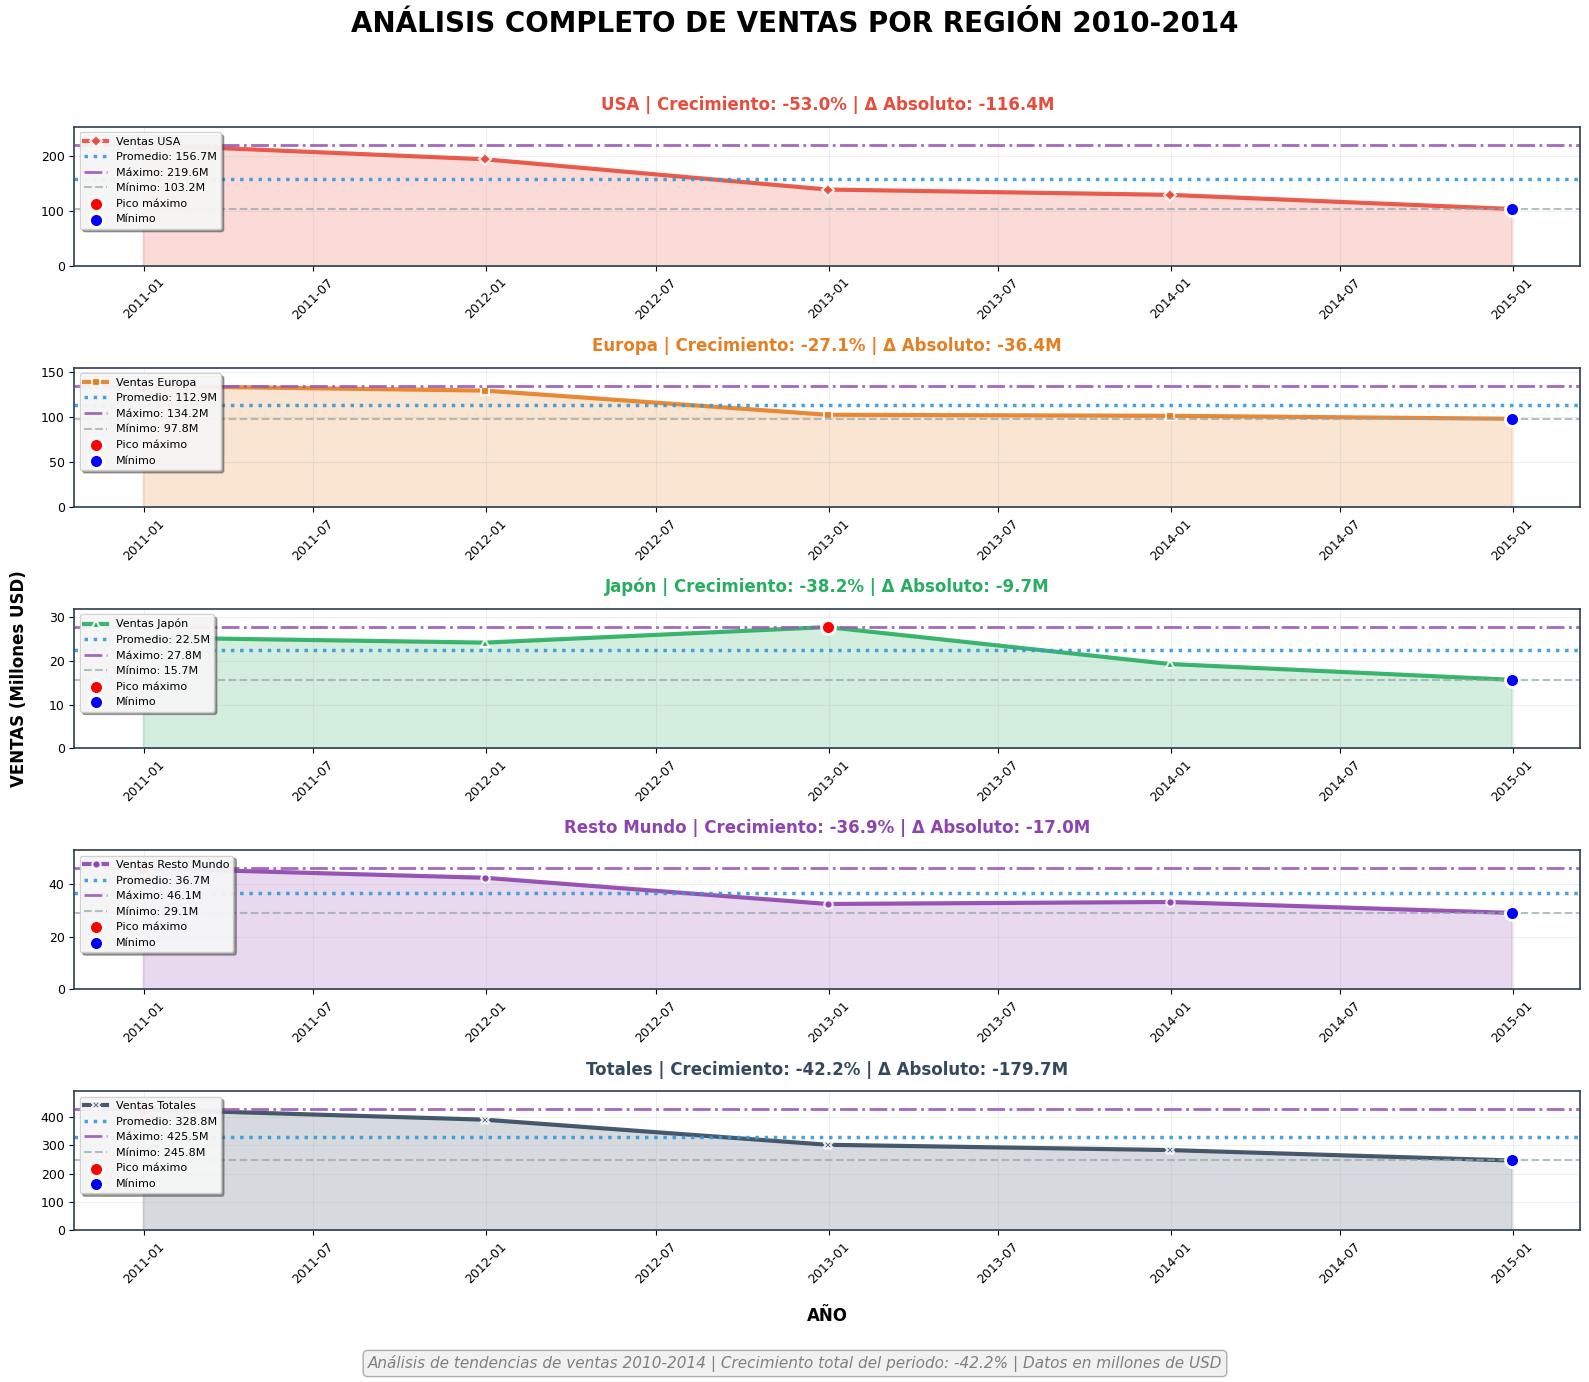

In [265]:
# CONFIGURACIÓN PROFESIONAL MEJORADA - VERSIÓN DINÁMICA
fig, ax = plt.subplots(5, 1, figsize=(16, 14))

# Obtener años disponibles dinámicamente
años_disponibles = df_promedio_ventas_3.index.tolist()
año_inicio = años_disponibles[0]
año_fin = años_disponibles[-1]
periodo = f"{año_inicio}-{año_fin}"

fig.suptitle(f'ANÁLISIS COMPLETO DE VENTAS POR REGIÓN 2010-2014',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada dinámica
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'marker': 'D'},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'marker': 's'},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'marker': '^'},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'marker': 'o'},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'marker': 'X'}
}

# Primero calcular límites Y dinámicamente
for region, config in configuraciones.items():
    if config['col'] in df_promedio_ventas_3.columns:
        data = df_promedio_ventas_3[config['col']]
        max_val = data.max()
        config['ylim'] = (0, max_val * 1.15)  # 15% de margen

for idx, (region, config) in enumerate(configuraciones.items()):
    try:
        if config['col'] not in df_promedio_ventas_3.columns:
            print(f"Advertencia: Columna {config['col']} no encontrada")
            continue

        data = df_promedio_ventas_3[config['col']]
        avg = data.mean()
        max_val = data.max()
        min_val = data.min()

        # Calcular métricas usando años disponibles
        valor_inicio = data.iloc[0]
        valor_fin = data.iloc[-1]
        crecimiento_absoluto = valor_fin - valor_inicio
        tasa_crecimiento = ((valor_fin - valor_inicio) / valor_inicio * 100) if valor_inicio != 0 else 0

        # Gráfico principal con marcadores diferenciados
        ax[idx].plot(data.index, data.values,
                     color=config['color'], linewidth=3, alpha=0.9,
                     marker=config['marker'], markersize=6,
                     markeredgecolor='white', markeredgewidth=1.5,
                     label=f'Ventas {region}')

        # Líneas de referencia mejoradas
        ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                       label=f'Promedio: {avg:.1f}M')
        ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                       label=f'Máximo: {max_val:.1f}M')
        ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                       label=f'Mínimo: {min_val:.1f}M')

        # Rellenar área bajo la curva
        ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

        # Destacar puntos importantes
        ax[idx].scatter(data.idxmax(), max_val, color='red', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Pico máximo')
        ax[idx].scatter(data.idxmin(), min_val, color='blue', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Mínimo')

        # Configuración del subplot con más información
        color_crecimiento = '#27AE60' if tasa_crecimiento > 0 else '#E74C3C'
        ax[idx].set_title(f'{region} | Crecimiento: {tasa_crecimiento:+.1f}% | '
                         f'Δ Absoluto: {crecimiento_absoluto:+.1f}M',
                         fontsize=12, fontweight='bold', pad=12, color=config['color'])

        ax[idx].legend(loc='upper left', frameon=True, fancybox=True,
                      shadow=True, fontsize=8, framealpha=0.9)
        ax[idx].grid(True, alpha=0.2, linestyle='-')
        ax[idx].set_ylim(config['ylim'])

        # Mejorar etiquetas de ejes
        ax[idx].tick_params(axis='x', rotation=45, labelsize=9)
        ax[idx].tick_params(axis='y', labelsize=9)

        # Ejes
        if idx == 2:
            ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12,
                              fontweight='bold', labelpad=15)
        if idx == 4:
            ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

        # Estética de spines mejorada
        for spine in ax[idx].spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#2C3E50')

    except Exception as e:
        print(f"Error inesperado en {region}: {e}")
        continue

# Calcular métricas generales del periodo
columnas_ventas = [config['col'] for config in configuraciones.values()
                  if config['col'] in df_promedio_ventas_3.columns and config['col'] != 'Ventas Totales']

if columnas_ventas:
    try:
        total_inicio = sum(df_promedio_ventas_3[columnas_ventas].iloc[0])
        total_fin = sum(df_promedio_ventas_3[columnas_ventas].iloc[-1])
        crecimiento_total = ((total_fin - total_inicio) / total_inicio * 100)
    except:
        total_inicio = total_fin = crecimiento_total = 0
else:
    total_inicio = total_fin = crecimiento_total = 0

# Añadir anotación general mejorada
fig.text(0.5, 0.01,
         f'Análisis de tendencias de ventas 2010-2014 | '
         f'Crecimiento total del periodo: {crecimiento_total:+.1f}% | '
         f'Datos en millones de USD',
         ha='center', fontsize=11, style='italic', color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.3))

# Añadir cuadro resumen dinámico


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

